In [1]:
from Bayesian_Neural_Network import bayesian_neural_network

import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

np.random.seed(10120024)

# Data Preparation

In [2]:
data = pd.read_csv('processed_data.csv')
undersampled_data = pd.read_csv('undersampled_data.csv')
undersampled_data_train = pd.read_csv('undersampled_data_train.csv')
undersampled_data_test = pd.read_csv('undersampled_data_test.csv')
non_undersampled_data = pd.read_csv('non_undersampled_data.csv')

feature_columns = undersampled_data.columns[:-1]
target_columns = undersampled_data.columns[-1]

In [20]:
undersampled_data_train

,V17,V12,V14,V10,V11,V16,Class
0,-2.830056,-2.899907,-4.289254,-2.772272,3.202033,-1.140747,1
1,0.599717,-0.503141,-1.692029,-0.838587,-0.414575,0.666780,1
2,-4.781831,-6.560124,-1.470102,-1.525412,2.032912,-2.282194,1
3,-12.598419,-10.912819,-6.771097,-4.801637,4.895844,-7.358083,1
4,6.739384,-4.609628,-6.079337,-2.447469,2.101344,2.581851,1
...,...,...,...,...,...,...,...
775,0.330515,-0.632174,-0.800569,-0.942309,-0.603284,0.246227,-1
776,1.838737,0.207283,-2.175012,-1.540368,-0.354309,-0.278532,-1
777,0.421363,-0.914954,-0.995392,-0.094944,-0.305136,1.085353,-1
778,0.992952,0.755386,-1.841571,-0.960243,-0.538759,0.093790,-1


In [21]:
undersampled_data_test

,V17,V12,V14,V10,V11,V16,Class
0,-0.828193,-0.973764,0.141332,1.081514,-1.514205,0.418268,1
1,-1.481283,-3.735153,-8.229952,-3.064730,3.480602,-0.408471,1
2,1.404507,-4.655071,-10.149813,-3.963224,4.469467,-0.288725,1
3,-2.865750,-2.134732,-4.566010,-3.272569,1.168216,-2.826986,1
4,0.334316,-3.501804,-6.065622,-2.223070,0.757063,-1.005723,1
5,-4.166479,-3.103477,-6.034403,-1.672346,2.172976,-2.383826,1
6,-3.712752,-3.127456,-5.926131,-2.162061,1.966123,-2.499307,1
7,-5.848903,-7.101488,-11.081617,-5.334754,3.618737,-3.302899,1
8,-3.008958,-7.836253,-13.202505,-6.120715,4.548495,-3.040863,1
9,1.734742,-0.323794,-1.422064,-1.000805,-0.191191,-0.387162,1


# Bayesian Neural Network Development

In [3]:
def predict_on_data(data):
    mean_pred = []
    var_pred = []
    
    for feature_data_i in data[feature_columns].values.reshape(-1, len(feature_columns), 1):
        _, _, _, _, _, _, _, mz, vz = bnn.bnn_fp.forward_propagation(feature_data_i, bnn.m, bnn.v, bnn.model_structure)
    
        mean_pred.append(mz[-1][0, 0])
        var_pred.append(vz[-1][0, 0])
    
    performance = pd.DataFrame({
                            'Mean Predictions':mean_pred,
                            'Var Predictions':var_pred
                        })
    
    performance['Binary Predictions'] = bnn.bnn_fp._binary_classification_output_activation_function(performance['Mean Predictions'].values)
    performance['Actual'] = data[target_columns].values

    return performance

def evaluate(data_to_evaluate):
    tp, fp, fn, tn  = confusion_matrix(data_to_evaluate['Binary Predictions'].values, 
                                   data_to_evaluate['Actual'].values, 
                                   labels=[1, -1]).ravel()
    
    # calculate the evaluation metrics for the model
    accuracy = (tp + tn) / (tp + tn + fp + fn) * 100
    precision = tp / (tp + fp) * 100
    recall = tp / (tp + fn) * 100
    
    for eval, text in zip([accuracy, precision, recall], ['Accuracy', 'Precision', 'Recall']):
        print(f'{text} : {np.round(eval, 3)}%')

    return

## Trains The Model Using The Undersampled Train Data

In [4]:
np.random.seed(10120024)

input_layer = [len(feature_columns)]
hidden_layers = [32, 48, 48, 32]
output_layer = [1]

total_epochs = 100
initial_lr = 1e-3
lr_decay_rate = 0.95
batch_size = 50

In [5]:
bnn = bayesian_neural_network(input_layer, 
                                hidden_layers, 
                                output_layer, 
                                undersampled_data_train[feature_columns].values, 
                                undersampled_data_train[target_columns].values, 
                                batch_size=batch_size,
                                initial_lr=initial_lr, 
                                lr_decay_rate=lr_decay_rate,
                                total_epochs=total_epochs)

<Axes: xlabel='Actual', ylabel='Mean Predictions'>

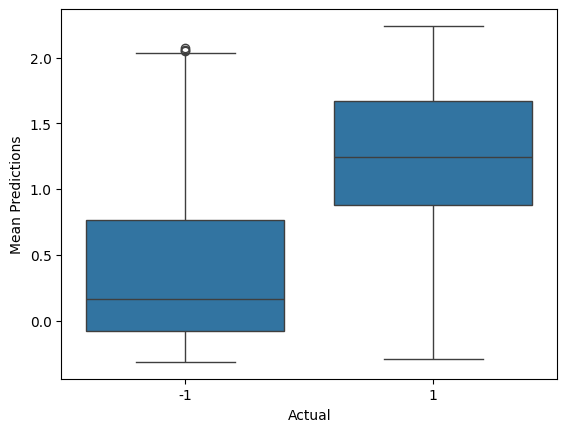

In [6]:
sns.boxplot(data=predict_on_data(undersampled_data_train), x='Actual', y='Mean Predictions')

In [7]:
bnn.train_model()

------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch : 1 / 100 - Learning Rate : 0.00095 - Succesfull Train Percentage : 100.0% - Time Passed : 1.63 Second
Accuracy : 69.61538461538461% - Precision : 91.64882226980728% - Sensitivity : 68.370607028754% - Standard Deviation : 2.1467781729642454
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch : 2 / 100 - Learning Rate : 0.0009025 - Succesfull Train Percentage : 100.0% - Time Passed : 1.56 Second
Accuracy : 70.76923076923077% - Precision : 91.22055674518201% - Sensitivity : 69.49429037520392% - Standard Deviation : 2.0439161770241556
-------------------------------------------------

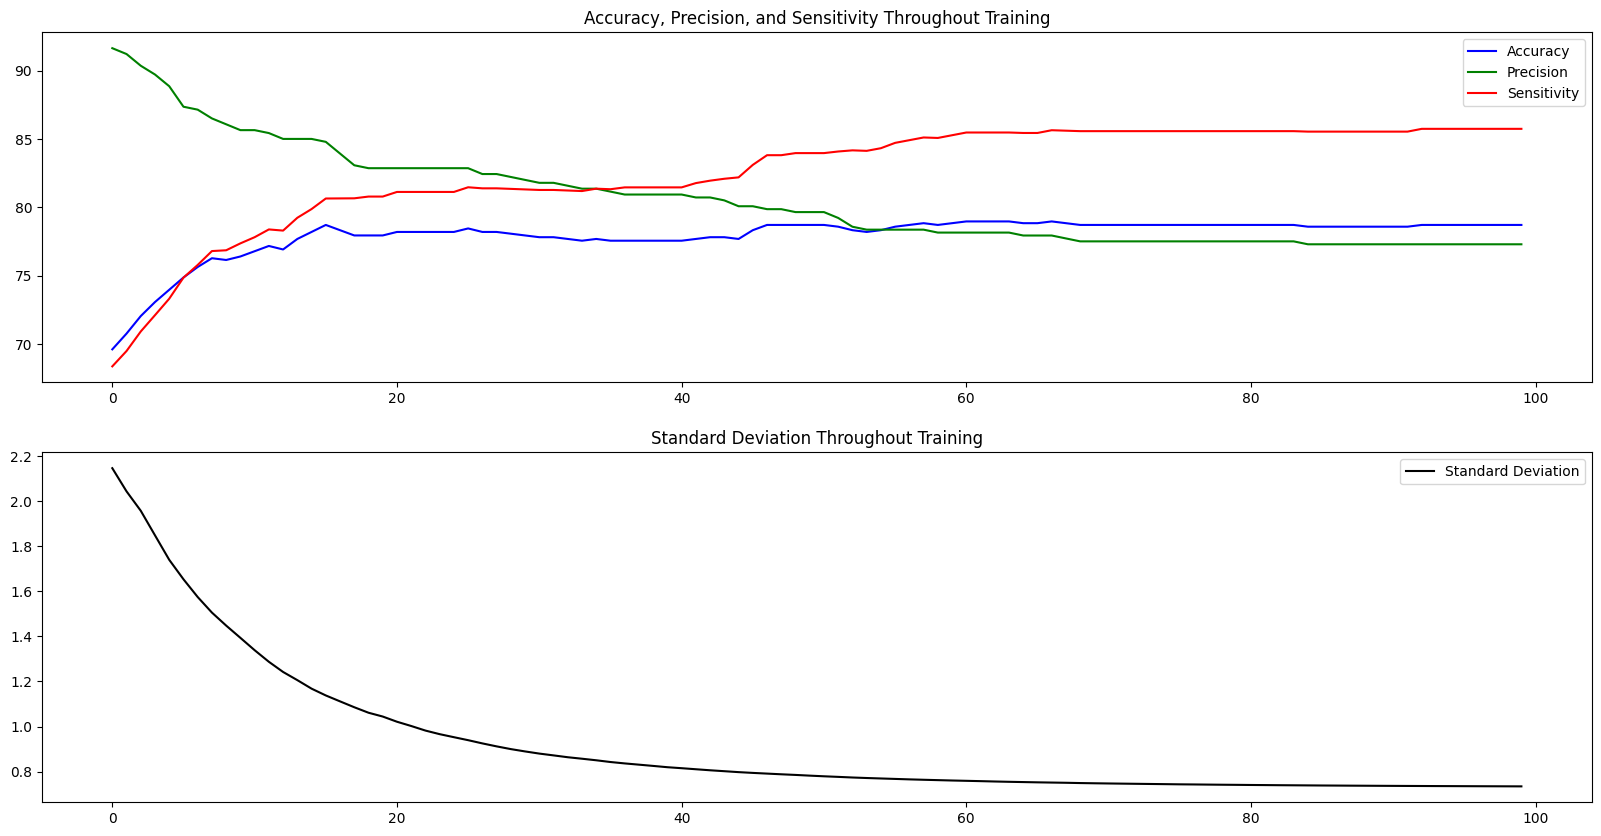

In [8]:
bnn.visualize_model_performance()

# Evaluate Model's Performance on Undersampled Train Data

<Axes: xlabel='Actual', ylabel='Mean Predictions'>

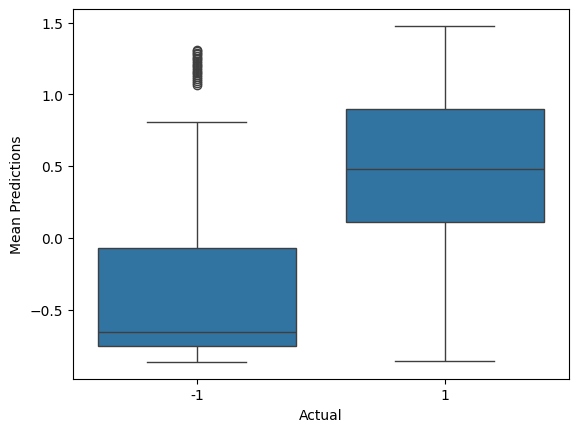

In [9]:
performance_on_train_data = predict_on_data(undersampled_data_train)

sns.boxplot(data=performance_on_train_data, x='Actual', y='Mean Predictions')

In [10]:
performance_on_train_data['Probability'] = performance_on_train_data.apply(lambda row: norm.pdf((row['Mean Predictions'] + row['Actual'] * 0.7) / (row['Var Predictions'] ** 0.5)), axis=1)

In [11]:
performance_on_train_data.describe()

,Mean Predictions,Var Predictions,Binary Predictions,Actual,Probability
count,780.000000,780.000000,780.000000,780.000000,7.800000e+02
mean,0.108361,0.734289,0.079487,0.197436,1.376716e-01
std,0.733494,1.018808,0.997476,0.980945,1.221484e-01
min,-0.865182,0.048514,-1.000000,-1.000000,4.322110e-12
25%,-0.660823,0.064296,-1.000000,-1.000000,2.087719e-05
50%,0.142663,0.281949,1.000000,1.000000,1.178110e-01
75%,0.695255,0.878056,1.000000,1.000000,1.997465e-01
max,1.476816,4.389479,1.000000,1.000000,3.989377e-01


# Evaluate Model's Performance on Undersampled Test Data

<Axes: xlabel='Actual', ylabel='Mean Predictions'>

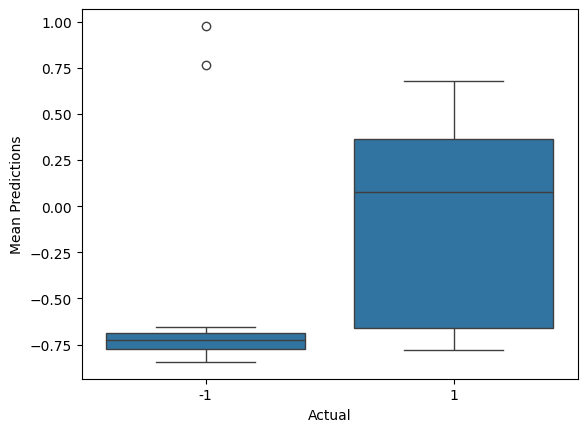

In [12]:
performance_on_test_data = predict_on_data(undersampled_data_test)

sns.boxplot(data=performance_on_test_data, x='Actual', y='Mean Predictions')

In [13]:
evaluate(performance_on_test_data)

Accuracy : 76.0%
Precision : 88.235%
Recall : 60.0%


In [14]:
performance_on_test_data['Probability'] = performance_on_test_data.apply(lambda row: norm.pdf((row['Mean Predictions'] + row['Actual'] * 0.7) / (row['Var Predictions'] ** 0.5)), axis=1)

In [15]:
performance_on_test_data

,Mean Predictions,Var Predictions,Binary Predictions,Actual,Probability
0,-0.681818,0.062304,-1,1,3.978853e-01
1,0.170809,0.298528,1,1,1.120269e-01
2,0.311376,0.397812,1,1,1.102978e-01
3,-0.021579,0.202773,-1,1,1.282418e-01
4,-0.102325,0.172968,-1,1,1.420541e-01
5,0.086025,0.251457,1,1,1.167814e-01
6,0.076991,0.246927,1,1,1.174905e-01
7,0.617697,0.747994,1,1,1.249810e-01
8,0.678900,0.848912,1,1,1.301820e-01
9,-0.766226,0.055212,-1,1,3.834076e-01


# Evaluate Model's Performance on Non-Undersampled Data

<Axes: xlabel='Actual', ylabel='Mean Predictions'>

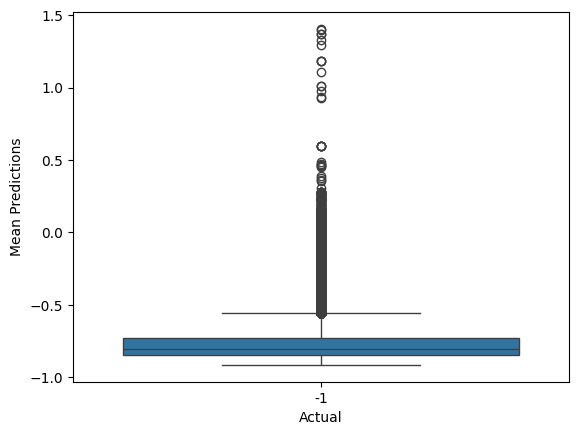

In [16]:
performance_on_non_undersampled_data = predict_on_data(non_undersampled_data)

sns.boxplot(data=performance_on_non_undersampled_data, x='Actual', y='Mean Predictions')

In [17]:
evaluate(performance_on_non_undersampled_data)

Accuracy : 99.919%
Precision : 0.0%
Recall : nan%


In [18]:
performance_on_non_undersampled_data['Probability'] = performance_on_non_undersampled_data.apply(lambda row: norm.pdf((row['Mean Predictions'] + row['Actual'] * 0.7) / (row['Var Predictions'] ** 0.5)), axis=1)

In [19]:
performance_on_non_undersampled_data.describe()

,Mean Predictions,Var Predictions,Binary Predictions,Actual,Probability
count,284003.000000,284003.000000,284003.000000,284003.0,2.840030e+05
mean,-0.774794,0.055790,-0.998373,-1.0,3.119639e-04
std,0.101772,0.022552,0.057016,0.0,7.589815e-03
min,-0.914741,0.045710,-1.000000,-1.0,1.638152e-13
25%,-0.845005,0.049753,-1.000000,-1.0,1.523060e-11
50%,-0.802452,0.052574,-1.000000,-1.0,1.893703e-10
75%,-0.728958,0.058170,-1.000000,-1.0,9.515811e-09
max,1.406255,3.798941,1.000000,-1.0,3.959387e-01
